In [276]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

fp = FontProperties(fname='C:/Windows/Fonts/meiryo.ttc', size=14)

In [277]:
from IPython.display import display
pd.set_option('display.max_columns', 100)

In [278]:
today = '2018-6-16'

In [279]:
df = pd.read_csv('./bunjou_cleaned_' + today + '.csv', index_col=0)

label_columns = ['土地権利']

for val in label_columns:
    le = LabelEncoder()
    le.fit(df[val])
    print(le.classes_)
    df[val] = le.transform(df[val])

for val in label_columns:
    df_oh = pd.get_dummies(df[val])
    df = pd.concat([df, df_oh], axis=1)

LabelEncoder()

['定期借地権（地上権）' '定期借地権（賃借権）' '所有権' '旧法地上権' '旧法賃借権' '普通地上権' '普通賃借権']


In [280]:
df = df.sample(frac=1)
df_x = df.drop(['価格', '管理費等', '修繕積立金'], axis=1)
df_y = df['価格']
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, shuffle=True)

In [281]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(df_x, df_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

0.976139522998386


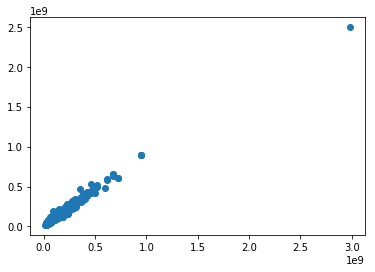

In [282]:
df_y_pred = regr.predict(df_x)
print(r2_score(df_y, df_y_pred))
plt.scatter(df_y, df_y_pred)

In [283]:
otoku = []
for i in range(0, len(df_y_pred)):
    otoku.append([i, df_y.values[i], df_y_pred[i], df_y_pred[i]/df_y.values[i]])
df_otoku = pd.DataFrame(otoku).set_index(0)

In [284]:
otoku_id = df_otoku[(df_otoku[1] > 40000000) & (df_otoku[1] < 60000000)].sort_values(by=3).tail(500).index

In [285]:
for i in otoku_id:
    if df_x['最寄り駅'][i:i+1].values[0] < 9.0:
        display(df[i:i+1])
        display(df_y[i:i+1])
        print(df_y_pred[i]/df_y[i:i+1])

,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1538,54800000.0,42100.0,20250.0,46,71.55,9.4,480,18.0,0,2,3,3.0,5.0,7.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


1538    54800000.0
Name: 価格, dtype: float64

1538    1.013181
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1453,52800000.0,21720.0,12360.0,62,63.69,5.44,143,24.0,1,2,4,2.0,4.0,8.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0


1453    52800000.0
Name: 価格, dtype: float64

1453    1.013258
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1455,52800000.0,21720.0,12360.0,62,63.69,5.44,143,25.0,1,2,4,2.0,4.0,8.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


1455    52800000.0
Name: 価格, dtype: float64

1455    1.013258
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1669,55900000.0,11900.0,15020.0,30,62.59,9.5,250,100.0,0,2,14,13.0,3.0,3.0,1,0,0,0,1,1,0,0,0,1,0,0,0,0


1669    55900000.0
Name: 価格, dtype: float64

1669    1.013536
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1668,55900000.0,11900.0,15020.0,30,62.59,9.5,250,99.0,0,2,14,13.0,3.0,3.0,1,1,1,0,1,1,0,0,0,1,0,0,0,0


1668    55900000.0
Name: 価格, dtype: float64

1668    1.013536
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1856,59800000.0,31640.0,24520.0,46,88.02,8.7,526,30.0,0,2,8,6.0,2.0,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1856    59800000.0
Name: 価格, dtype: float64

1856    1.014883
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1854,59800000.0,15360.0,15280.0,62,76.4,9.32,430,111.0,0,2,14,5.0,2.0,2.0,1,1,1,1,0,1,0,0,0,1,0,0,0,0


1854    59800000.0
Name: 価格, dtype: float64

1854    1.016165
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1745,57800000.0,13670.0,10000.0,47,66.69,9.2,119,129.0,1,2,5,5.0,4.0,3.0,0,1,0,1,1,0,1,0,0,1,0,0,0,0


1745    57800000.0
Name: 価格, dtype: float64

1745    1.017344
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1227,49800000.0,20700.0,18300.0,46,63.17,0.0,379,32.0,1,2,6,3.0,5.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1227    49800000.0
Name: 価格, dtype: float64

1227    1.021968
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1456,52800000.0,21720.0,12360.0,62,63.69,5.44,143,24.0,1,2,4,2.0,4.0,8.0,1,1,1,1,1,0,1,0,0,1,0,0,0,0


1456    52800000.0
Name: 価格, dtype: float64

1456    1.022727
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3939,56800000.0,12020.0,21800.0,46,72.68,0.0,94,20.0,0,2,3,2.0,4.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3939    56800000.0
Name: 価格, dtype: float64

3939    1.024648
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
970,45800000.0,19830.0,10000.0,47,70.57,14.5,425,24.0,0,2,7,2.0,7.0,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


970    45800000.0
Name: 価格, dtype: float64

970    1.025546
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1034,46800000.0,11800.0,18150.0,46,75.62,7.68,464,170.0,0,2,10,4.0,6.0,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1034    46800000.0
Name: 価格, dtype: float64

1034    1.025705
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1644,55800000.0,21150.0,9375.0,46,75.0,9.0,680,66.0,1,2,6,1.0,3.0,7.0,1,1,1,1,0,1,0,0,0,1,0,0,0,0


1644    55800000.0
Name: 価格, dtype: float64

1644    1.026398
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1855,59800000.0,15360.0,15280.0,62,76.4,9.32,430,111.0,0,2,14,5.0,2.0,2.0,1,1,1,0,1,1,0,0,0,1,0,0,0,0


1855    59800000.0
Name: 価格, dtype: float64

1855    1.029877
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
910,44900000.0,16400.0,10000.0,30,64.76,11.78,520,102.0,0,2,14,13.0,5.0,3.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0


910    44900000.0
Name: 価格, dtype: float64

910    1.039421
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1425,52500000.0,25400.0,18300.0,46,74.83,4.76,442,33.0,0,2,6,3.0,5.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


1425    52500000.0
Name: 価格, dtype: float64

1425    1.042781
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1666,55900000.0,11730.0,13170.0,47,67.21,14.0,237,19.0,0,2,5,3.0,5.0,4.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0


1666    55900000.0
Name: 価格, dtype: float64

1666    1.044097
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1424,52500000.0,25400.0,18300.0,46,74.83,4.76,442,33.0,1,2,6,3.0,5.0,5.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


1424    52500000.0
Name: 価格, dtype: float64

1424    1.044114
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1230,49800000.0,9400.0,2450.0,16,77.29,2.0,431,36.0,0,2,9,2.0,2.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1230    49800000.0
Name: 価格, dtype: float64

1230    1.049757
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1747,57800000.0,16765.0,9387.0,46,79.77,13.22,365,576.0,0,2,25,15.0,2.0,6.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0


1747    57800000.0
Name: 価格, dtype: float64

1747    1.057093
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3931,55800000.0,14834.0,8054.0,46,68.45,7.45,365,192.0,0,2,25,2.0,2.0,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3931    55800000.0
Name: 価格, dtype: float64

3931    1.05836
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1748,57800000.0,21860.0,14600.0,46,64.1,7.82,142,24.0,1,2,4,4.0,4.0,8.0,1,0,1,1,1,0,0,0,0,1,0,0,0,0


1748    57800000.0
Name: 価格, dtype: float64

1748    1.063495
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3864,45000000.0,21150.0,9375.0,46,75.0,0.0,680,66.0,0,2,6,6.0,3.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3864    45000000.0
Name: 価格, dtype: float64

3864    1.064711
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
731,43800000.0,18300.0,15400.0,62,76.59,8.1,554,28.0,0,2,11,2.0,6.0,5.0,1,1,1,0,1,1,0,0,0,1,0,0,0,0


731    43800000.0
Name: 価格, dtype: float64

731    1.066849
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
636,42300000.0,16000.0,9000.0,62,69.26,4.38,463,30.0,0,2,11,1.0,3.0,5.0,1,1,1,0,0,0,1,0,0,1,0,0,0,0


636    42300000.0
Name: 価格, dtype: float64

636    1.07036
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3903,50000000.0,13000.0,15970.0,62,72.83,10.23,243,123.0,0,2,13,2.0,3.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3903    50000000.0
Name: 価格, dtype: float64

3903    1.074
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1479,53500000.0,11136.0,16300.0,30,60.45,11.7,131,52.0,0,2,14,3.0,6.0,6.0,1,1,1,1,0,1,0,0,0,1,0,0,0,0


1479    53500000.0
Name: 価格, dtype: float64

1479    1.088972
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
912,44900000.0,18200.0,21840.0,63,67.39,6.95,440,1.0,0,2,5,3.0,6.0,10.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0


912    44900000.0
Name: 価格, dtype: float64

912    1.091163
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1332,50800000.0,12020.0,21800.0,46,72.68,3.22,94,10.0,0,2,3,1.0,4.0,7.0,1,0,1,1,1,1,1,0,0,1,0,0,0,0


1332    50800000.0
Name: 価格, dtype: float64

1332    1.09685
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1884,59800000.0,9900.0,7800.0,46,65.99,5.33,211,39.0,0,2,12,6.0,4.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1884    59800000.0
Name: 価格, dtype: float64

1884    1.097456
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3919,53500000.0,11136.0,16300.0,30,60.45,11.7,131,52.0,0,2,14,3.0,6.0,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3919    53500000.0
Name: 価格, dtype: float64

3919    1.10215
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
619,41980000.0,16000.0,9000.0,62,69.26,0.0,463,30.0,0,2,11,1.0,3.0,5.0,1,1,1,0,0,0,1,0,0,1,0,0,0,0


619    41980000.0
Name: 価格, dtype: float64

619    1.120753
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
654,42800000.0,15700.0,19910.0,46,64.29,0.0,488,42.0,0,2,3,3.0,6.0,7.0,0,1,1,0,0,1,0,0,0,1,0,0,0,0


654    42800000.0
Name: 価格, dtype: float64

654    1.142757
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1882,59800000.0,15300.0,6000.0,46,60.01,15.25,28,44.0,0,2,10,6.0,4.0,11.0,1,0,1,1,1,1,0,0,0,1,0,0,0,0


1882    59800000.0
Name: 価格, dtype: float64

1882    1.144853
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1859,59800000.0,25680.0,24750.0,46,77.33,20.0,405,62.0,0,2,7,7.0,8.0,5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1859    59800000.0
Name: 価格, dtype: float64

1859    1.148125
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1697,56800000.0,18000.0,14700.0,46,65.17,3.39,235,54.0,0,2,13,10.0,3.0,3.0,1,0,0,1,1,0,1,0,0,1,0,0,0,0


1697    56800000.0
Name: 価格, dtype: float64

1697    1.159724
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3936,56800000.0,23240.0,20020.0,46,68.57,11.34,210,19.0,1,2,4,2.0,2.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3936    56800000.0
Name: 価格, dtype: float64

3936    1.183099
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1690,56000000.0,17345.0,21024.0,63,108.3,7.56,568,34.0,0,2,7,6.0,4.0,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1690    56000000.0
Name: 価格, dtype: float64

1690    1.208214
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
501,40800000.0,15300.0,10080.0,30,61.6,0.0,427,70.0,0,2,11,10.0,4.0,13.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


501    40800000.0
Name: 価格, dtype: float64

501    1.242647
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
3892,49800000.0,0.0,0.0,78,84.77,0.0,468,18.0,0,2,6,3.0,5.0,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


3892    49800000.0
Name: 価格, dtype: float64

3892    1.256386
Name: 価格, dtype: float64


,価格,管理費等,修繕積立金,間取り,専有面積,バルコニー,築年月,総戸数,駐車場,土地権利,総階数,階,最寄り駅,駅から,浴室乾燥機,温水洗浄便座,追焚機能,オートロック,宅配ＢＯＸ,食器洗浄乾燥機,床暖房,0,1,2,3,4,5,6
1452,52800000.0,31040.0,24190.0,46,88.09,6.75,535,23.0,0,2,8,6.0,5.0,6.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


1452    52800000.0
Name: 価格, dtype: float64

1452    1.270833
Name: 価格, dtype: float64


<Figure size 864x864 with 0 Axes>

<BarContainer object of 25 artists>

([<matplotlib.axis.YTick at 0x1f6081db908>,
 <a list of 25 Text yticklabel objects>)

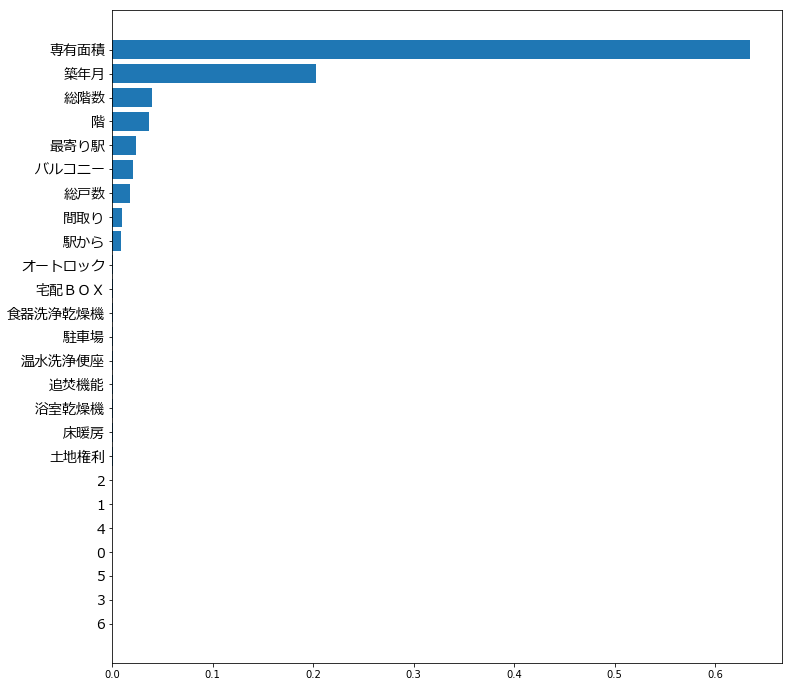

In [286]:
values, names = zip(*sorted(zip(regr.feature_importances_, df_x.columns)))

plt.figure(figsize=(12,12))
plt.barh(range(len(names)), values, align='center')
plt.yticks(range(len(names)), names, fontproperties=fp)